In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm

## 0) Data Load

In [7]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [8]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [9]:
train_df1 = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [10]:
train_df = train_df1.copy()

17년 데이터는 생략한 상태

# 1) Analysis Outer-Feature

## 1.1) Overview the Tax-feature data

- 'taxvaluedollarcnt'
- 'structuretaxvaluedollarcnt'
- 'landtaxvaluedollarcnt'
- 'taxamount'
- 'assessmentyear'
- 'taxdelinquencyflag'
- 'taxdelinquencyyear'

In [1]:
tax_feature = [
    '소포의 총 세금 평가 가치',
    '소포에 건설 된 구조물의 평가 된 가치',
    '소포의 토지 면적에 대한 평가 된 가치',
    '해당 평가 연도에 대해 평가 된 총 재산세',
    '재산세 산정 년도',
    '이 소포의 재산세는 2015 년까지 만기가됩니다.',
    '미납 된 재산세 납부시기'
]

In [2]:
tax_feature_col = [
    'taxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
    'assessmentyear',
    'taxdelinquencyflag',
    'taxdelinquencyyear'
]

In [5]:
tax_df = pd.DataFrame(columns=['name','feature'])
tax_df.name = tax_feature_col
tax_df.feature = tax_feature
tax_df

,name,feature
0,taxvaluedollarcnt,소포의 총 세금 평가 가치
1,structuretaxvaluedollarcnt,소포에 건설 된 구조물의 평가 된 가치
2,landtaxvaluedollarcnt,소포의 토지 면적에 대한 평가 된 가치
3,taxamount,해당 평가 연도에 대해 평가 된 총 재산세
4,assessmentyear,재산세 산정 년도
5,taxdelinquencyflag,이 소포의 재산세는 2015 년까지 만기가됩니다.
6,taxdelinquencyyear,미납 된 재산세 납부시기


## 1.2) Datatype of Columns

In [11]:
print(train_df[tax_feature_col].dtypes,end='\n\n'),
print('Number of tax_feature_col:  {}'.format(len(tax_feature_col)))

taxvaluedollarcnt             float64
structuretaxvaluedollarcnt    float64
landtaxvaluedollarcnt         float64
taxamount                     float64
assessmentyear                float64
taxdelinquencyflag             object
taxdelinquencyyear            float64
dtype: object

Number of tax_feature_col:  7


- Tax_feature에는 7개의 컬럼이 있고, 한 개의 object 자료형과 6개의 float형이 있다.
- numerical data, object data 를 가지고 있는 컬럼들을 나눠서 분석을 하도록 하겠다.

In [12]:
tax_numeric = []
tax_object = []
for col in tax_feature_col:
    if train_df[col].dtypes == 'float64':
        tax_numeric.append(col)
    else:tax_object.append(col)

In [14]:
tax_numeric
print(len(tax_numeric))

6


In [13]:
tax_object
print(len(tax_object))

1


## 1.3) Individual columns' feature analysis

### scatter plot about numerical data

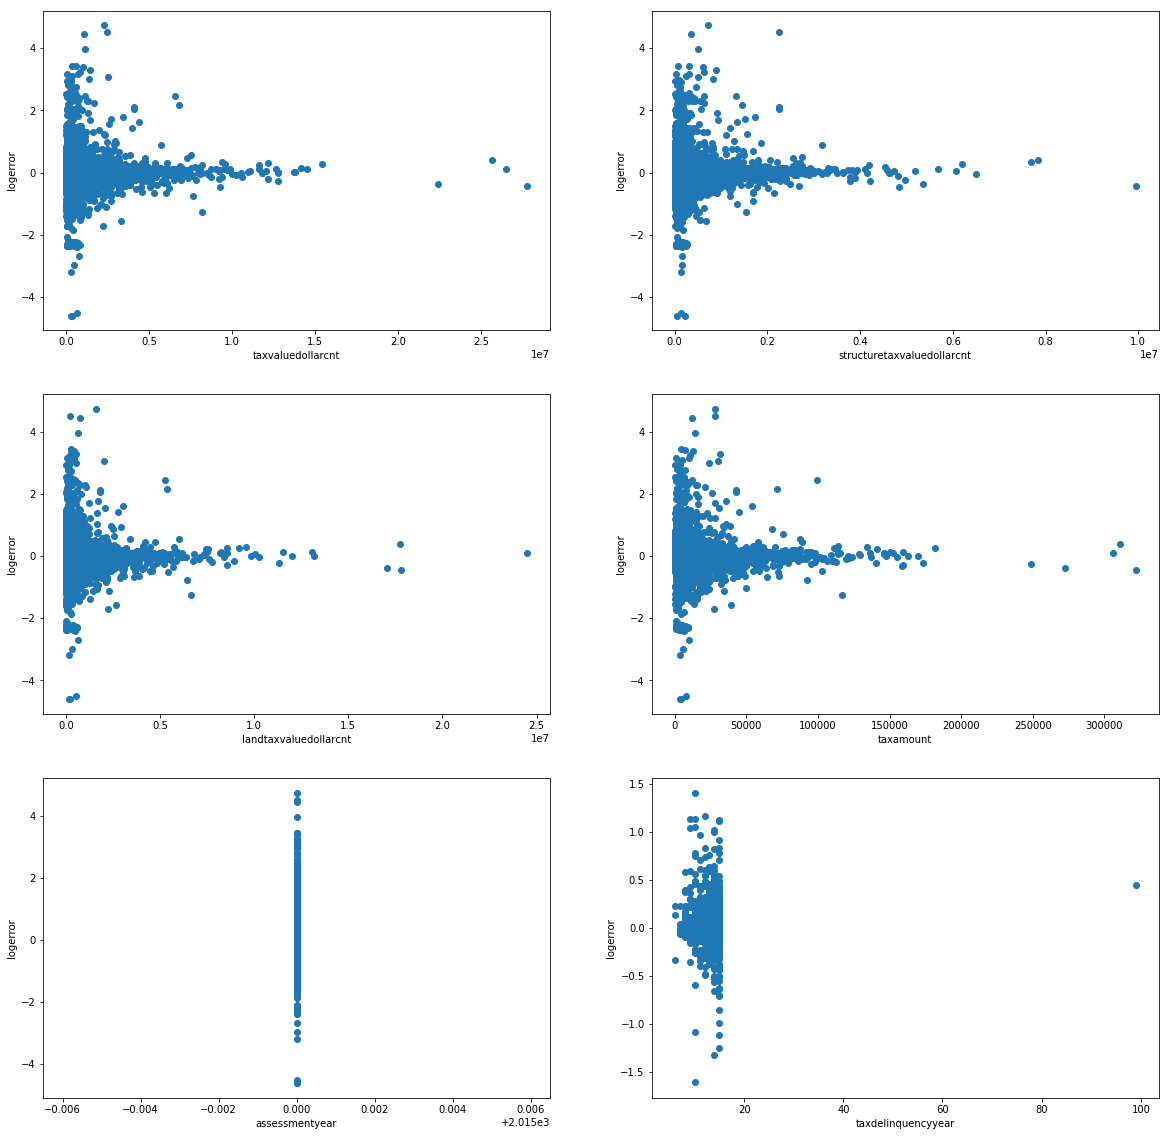

In [15]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(tax_numeric):
    plt.subplot(3,2,idx+1)
    plt.scatter(train_df[col],train_df.logerror)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show()

- float 자료형에 대한 scatterplot을 그려본 결과 분포의 형태가 continuous하지 않고, discrete한 분포를 띄고 있다.
- 즉, numeric category를 가지고 있을 수 있는 컬럼이라고 생각하고, 카테고리의 갯수를 40개 미만으로 가지는 데이터에 대해서 다시 분포에 대해 시각화해본다.

In [17]:
discrete_tax_col = []
for idx,col in enumerate(tax_numeric):
    if len(train_df[col].value_counts())<40:
        print(train_df[col].value_counts())
        discrete_tax_col.append(col)
len(discrete_tax_col)

2015.0    90275
Name: assessmentyear, dtype: int64
14.0    628
15.0    518
13.0    210
12.0    154
10.0     89
11.0     85
9.0      63
8.0      24
7.0       8
6.0       3
99.0      1
Name: taxdelinquencyyear, dtype: int64


2

40 개 미만의 카테고리를 가지는 discrete data column 이 총 2개가 나왔다. 이 컬럼들에 대해서 stripplot,viloinplot을 적용해 시각화한다.

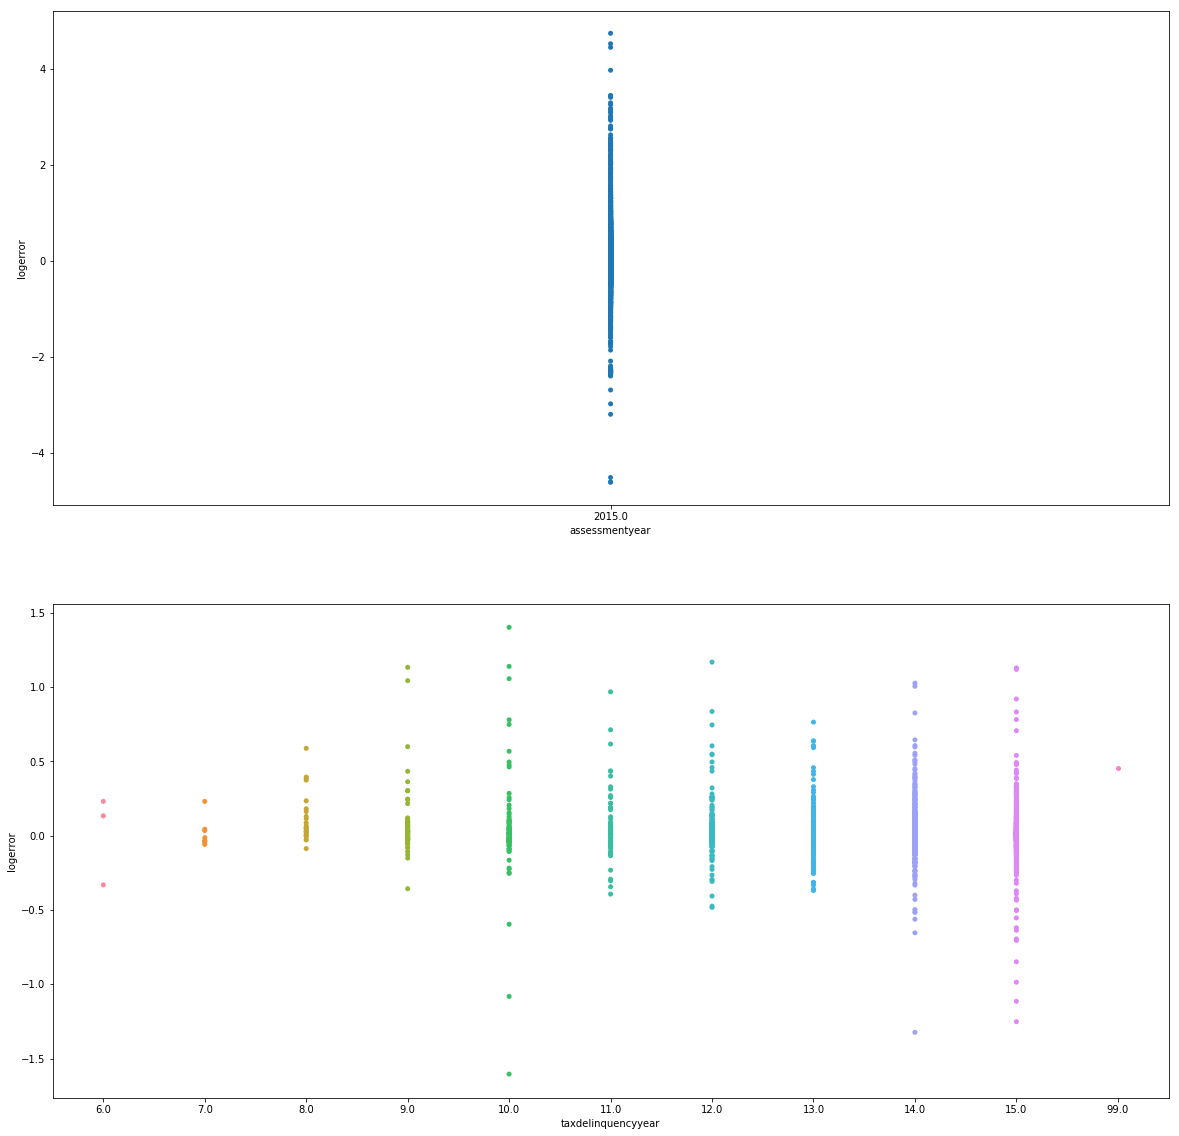

In [21]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_tax_col):
    plt.subplot(2,1,idx+1)
    sns.stripplot(train_df[col],train_df.logerror,data=train_df)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show(col)

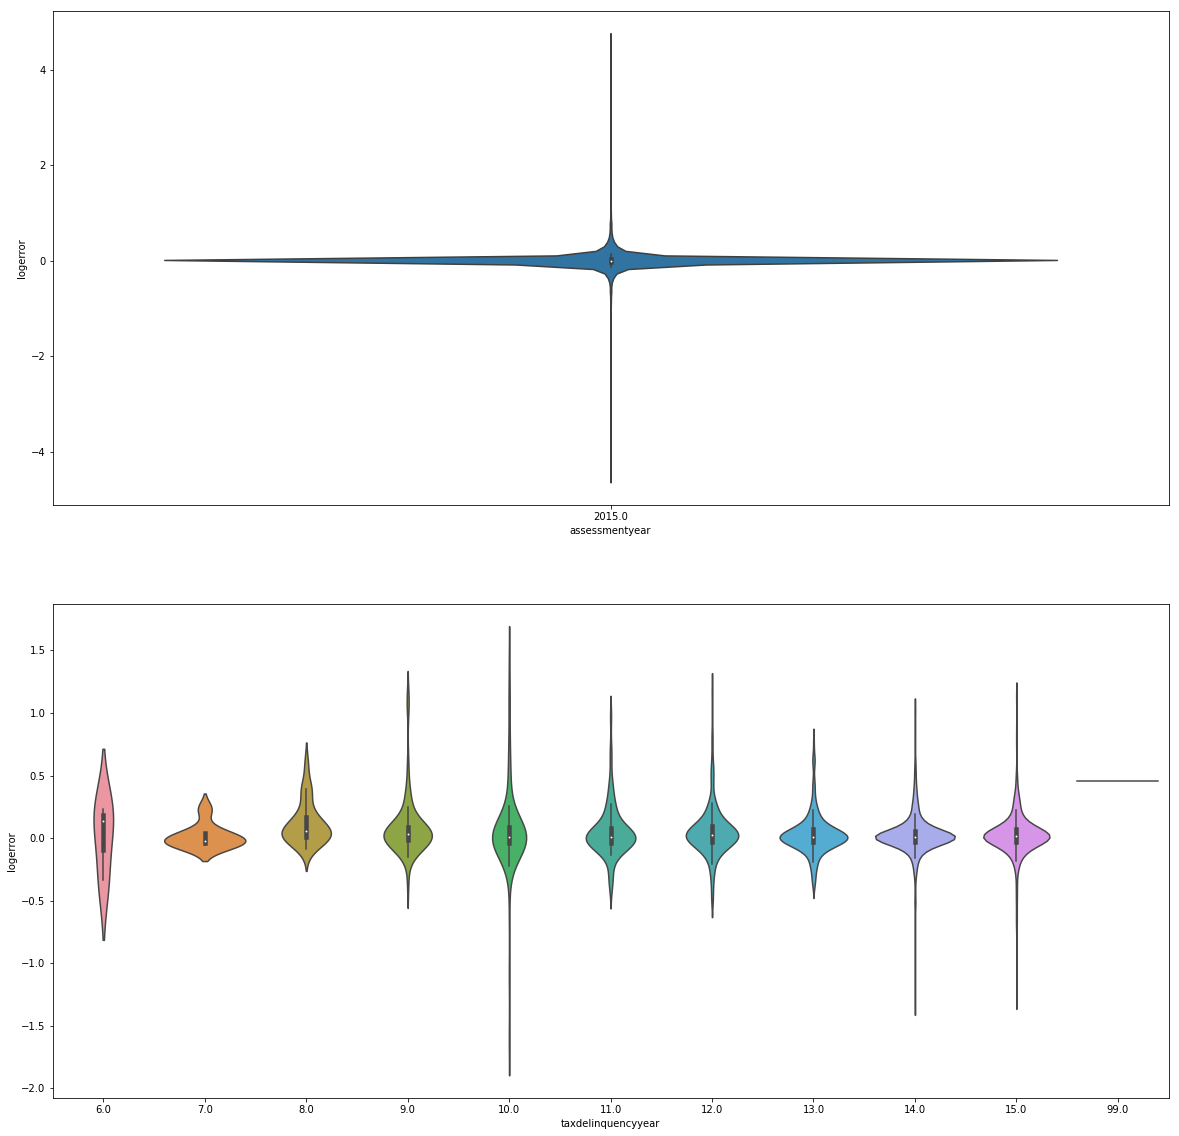

In [22]:
plt.figure(figsize=(20,20))
for idx,col in enumerate(discrete_tax_col):
    plt.subplot(2,1,idx+1)
    sns.violinplot(train_df[col],train_df.logerror,data=train_df)
    plt.xlabel(col)
    plt.ylabel('logerror')
plt.show(col)

- assessmentyear 는 2015년 카테고리 하나를 가지고 있다.
- taxdelinquencyyear column는 고르게 분포되어있으며 카테고리도 다양한 편이다.

마지막으로, object datatype을 가지는 컬럼 1개에 대해서도 countplot으로 시각화를 한다.

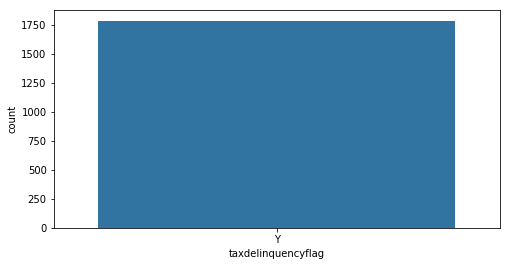

In [23]:
plt.figure(figsize=(8,4))
for idx,col in enumerate(tax_object):
#     plt.subplot(2,1,idx+1)
    sns.countplot(train_df[col],data=train_df)
    plt.xlabel(col)
    plt.ylabel('count')
plt.show()

- object datatype의 카테고리는 y하나이다. 
- data cleaning 때 고려할 사항이다.

# 2) Analysis Missing value 

우선 inner-feature 내의 컬럼들로 구성된 데이터 프레임 'tax_df'를 생성해보겠습니다.

In [24]:
tax_df = train_df[tax_feature_col]
tax_df.tail()

,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear,taxdelinquencyflag,taxdelinquencyyear
90270,191000.0,43800.0,147200.0,2495.24,2015.0,NaN,NaN
90271,161111.0,117893.0,43218.0,1886.54,2015.0,NaN,NaN
90272,38096.0,22008.0,16088.0,1925.70,2015.0,Y,14.0
90273,165869.0,132991.0,32878.0,2285.57,2015.0,NaN,NaN
90274,163037.0,66258.0,96779.0,2560.96,2015.0,NaN,NaN


In [25]:
missing_tax_df = tax_df.isnull().sum().reset_index()
missing_tax_df.columns = ['col','missing_cnt']
missing_tax_df['missing_ratio'] = missing_tax_df.missing_cnt / len(tax_df)
missing_tax_df

,col,missing_cnt,missing_ratio
0,taxvaluedollarcnt,1,0.000011
1,structuretaxvaluedollarcnt,380,0.004209
2,landtaxvaluedollarcnt,1,0.000011
3,taxamount,6,0.000066
4,assessmentyear,0,0.000000
5,taxdelinquencyflag,88492,0.980249
6,taxdelinquencyyear,88492,0.980249


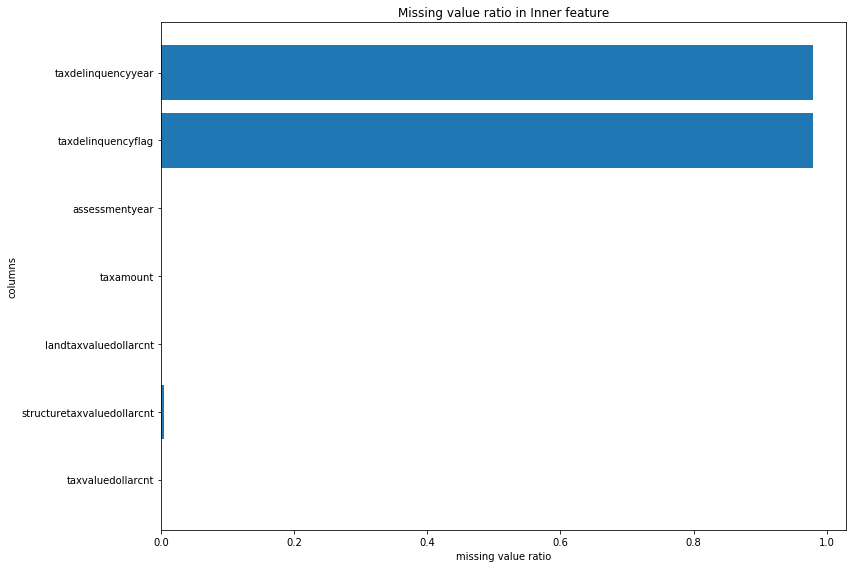

In [26]:
plt.figure(figsize=(12,8))
plt.barh(missing_tax_df.col,missing_tax_df.missing_ratio)
plt.title('Missing value ratio in Inner feature')
plt.xlabel('missing value ratio')
plt.ylabel('columns')
plt.tight_layout()
plt.show()

missing_value_ratio가 많다..